In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import G
from astropy import units as u
from scipy.integrate import quad
import symlib
import os
from glob import glob
import seaborn as sns

base_dir = "/Users/fengbocheng/Projects/Symphony-PPSD"
suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]
sim_colors = {
        "SymphonyLMC": sns.color_palette("colorblind")[4],
        "SymphonyMilkyWay": sns.color_palette("colorblind")[0],
        "SymphonyGroup": sns.color_palette("colorblind")[2],
        "SymphonyLCluster": sns.color_palette("colorblind")[1],
        "SymphonyCluster": sns.color_palette("colorblind")[3],
    }
sim_names = {
        "SymphonyLMC": "LMC",
        "SymphonyMilkyWay": "Milky Way",
        "SymphonyGroup": "Group",
        "SymphonyLCluster": "L-Cluster",
        "SymphonyCluster": "Cluster",
    }
mean_cvir = {
    "SymphonyLMC": 12.2,
    "SymphonyMilkyWay": 10.8,
    "SymphonyGroup": 9.0,
    "SymphonyLCluster": 5.0,
    "SymphonyCluster": 5.3,
}
out_dir = os.path.join(base_dir, "output", "final_panels")

In [ ]:
for suite in suite_names:
    params = symlib.simulation_parameters(suite)
    print(params)

{'flat': True, 'H0': 70.0, 'Om0': 0.286, 'Ob0': 0.049, 'sigma8': 0.82, 'ns': 0.95, 'eps': 0.08, 'mp': 35247.6, 'h100': 0.7}
{'flat': True, 'H0': 70.0, 'Om0': 0.286, 'Ob0': 0.049, 'sigma8': 0.82, 'ns': 0.95, 'eps': 0.17, 'mp': 281981.0, 'h100': 0.7}
{'flat': True, 'H0': 70.0, 'Om0': 0.286, 'Ob0': 0.049, 'sigma8': 0.82, 'ns': 0.95, 'eps': 0.36, 'mp': 2255850.0, 'h100': 0.7}
{'flat': True, 'H0': 70.0, 'Om0': 0.3, 'Ob0': 0.049, 'sigma8': 0.85, 'ns': 0.95, 'eps': 1.2, 'mp': 151441632.0, 'h100': 0.7}
{'flat': True, 'H0': 70.0, 'Om0': 0.25, 'Ob0': 0.049, 'sigma8': 0.8, 'ns': 1, 'eps': 3.25, 'mp': 126201360.0, 'h100': 0.7}


In [4]:
def save_virial_radius(input_dir,suite_name):
    output_dir = os.path.join(base_dir, "output", suite_name)

    n_halos = symlib.n_hosts(suite_name)
    halo_ids, rvir_list = [], []

    for halo_idx in range(n_halos):
        sim_dir = symlib.get_host_directory(input_dir, suite_name, halo_idx)
        try:
            r, _ = symlib.read_rockstar(sim_dir)
            rvir = r[0, -1]["rvir"] # [kpc]
            halo_ids.append(f'{halo_idx:03d}')
            rvir_list.append(rvir)
        except FileNotFoundError:
            print(f"[Warning] Rockstar file not found for Halo {halo_idx}")
            continue

    df = pd.DataFrame({"halo_id": halo_ids, "rvir": rvir_list})
    df.to_csv(os.path.join(output_dir, "virial_radius.csv"), index=False)
    print(f"[Saved] Radius CSV to {output_dir}/virial_radius.csv")

save_virial_radius('/Volumes/Atlas/Symphony', 'SymphonyLMC')
save_virial_radius('/Volumes/Atlas/Symphony', 'SymphonyMilkyWay')
save_virial_radius('/Volumes/Expansion/Symphony', 'SymphonyGroup')
save_virial_radius('/Volumes/Atlas/Symphony', 'SymphonyLCluster')
save_virial_radius('/Volumes/Expansion/Symphony', 'SymphonyCluster')

[Saved] Radius CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyLMC/virial_radius.csv
[Saved] Radius CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyMilkyWay/virial_radius.csv
[Saved] Radius CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyGroup/virial_radius.csv
[Saved] Radius CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyLCluster/virial_radius.csv
[Saved] Radius CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyCluster/virial_radius.csv


In [5]:
def save_virial_velocity(input_dir, suite_name):
    output_dir = os.path.join(base_dir, "output", suite_name)

    n_halos = symlib.n_hosts(suite_name)
    halo_ids, vvir_list = [], []

    for halo_idx in range(n_halos):
        sim_dir = symlib.get_host_directory(input_dir, suite_name, halo_idx)
        try:
            r, _ = symlib.read_rockstar(sim_dir)
            host = r[0, -1]
            v_host = host['v'][-1]         # Halo bulk velocity [km/s]
            r_vir = host['rvir']           # Virial radius [kpc]
            m_vir = host['m']              # Virial mass [Msun]
            m = m_vir * u.Msun
            r = r_vir * u.kpc
            G_kpc = G.to(u.kpc * (u.km/u.s)**2 / u.Msun)
            vvir = np.sqrt(G_kpc * m / r).to(u.km / u.s).value  # Virial velocity [km/s]

            halo_ids.append(f'{halo_idx:03d}')
            vvir_list.append(vvir)
        except FileNotFoundError:
            print(f"[Warning] Rockstar file not found for Halo {halo_idx}")
            continue

    df = pd.DataFrame({"halo_id": halo_ids, "vvir": vvir_list})
    df.to_csv(os.path.join(output_dir, "virial_velocity.csv"), index=False)
    print(f"[Saved] Velocity CSV to {output_dir}/virial_velocity.csv")

save_virial_velocity('/Volumes/Atlas/Symphony', 'SymphonyLMC')
save_virial_velocity('/Volumes/Atlas/Symphony', 'SymphonyMilkyWay')
save_virial_velocity('/Volumes/Expansion/Symphony', 'SymphonyGroup')
save_virial_velocity('/Volumes/Atlas/Symphony', 'SymphonyLCluster')
save_virial_velocity('/Volumes/Expansion/Symphony', 'SymphonyCluster')

[Saved] Velocity CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyLMC/virial_velocity.csv
[Saved] Velocity CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyMilkyWay/virial_velocity.csv
[Saved] Velocity CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyGroup/virial_velocity.csv
[Saved] Velocity CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyLCluster/virial_velocity.csv
[Saved] Velocity CSV to /Users/fengbocheng/Projects/Symphony-PPSD/output/SymphonyCluster/virial_velocity.csv


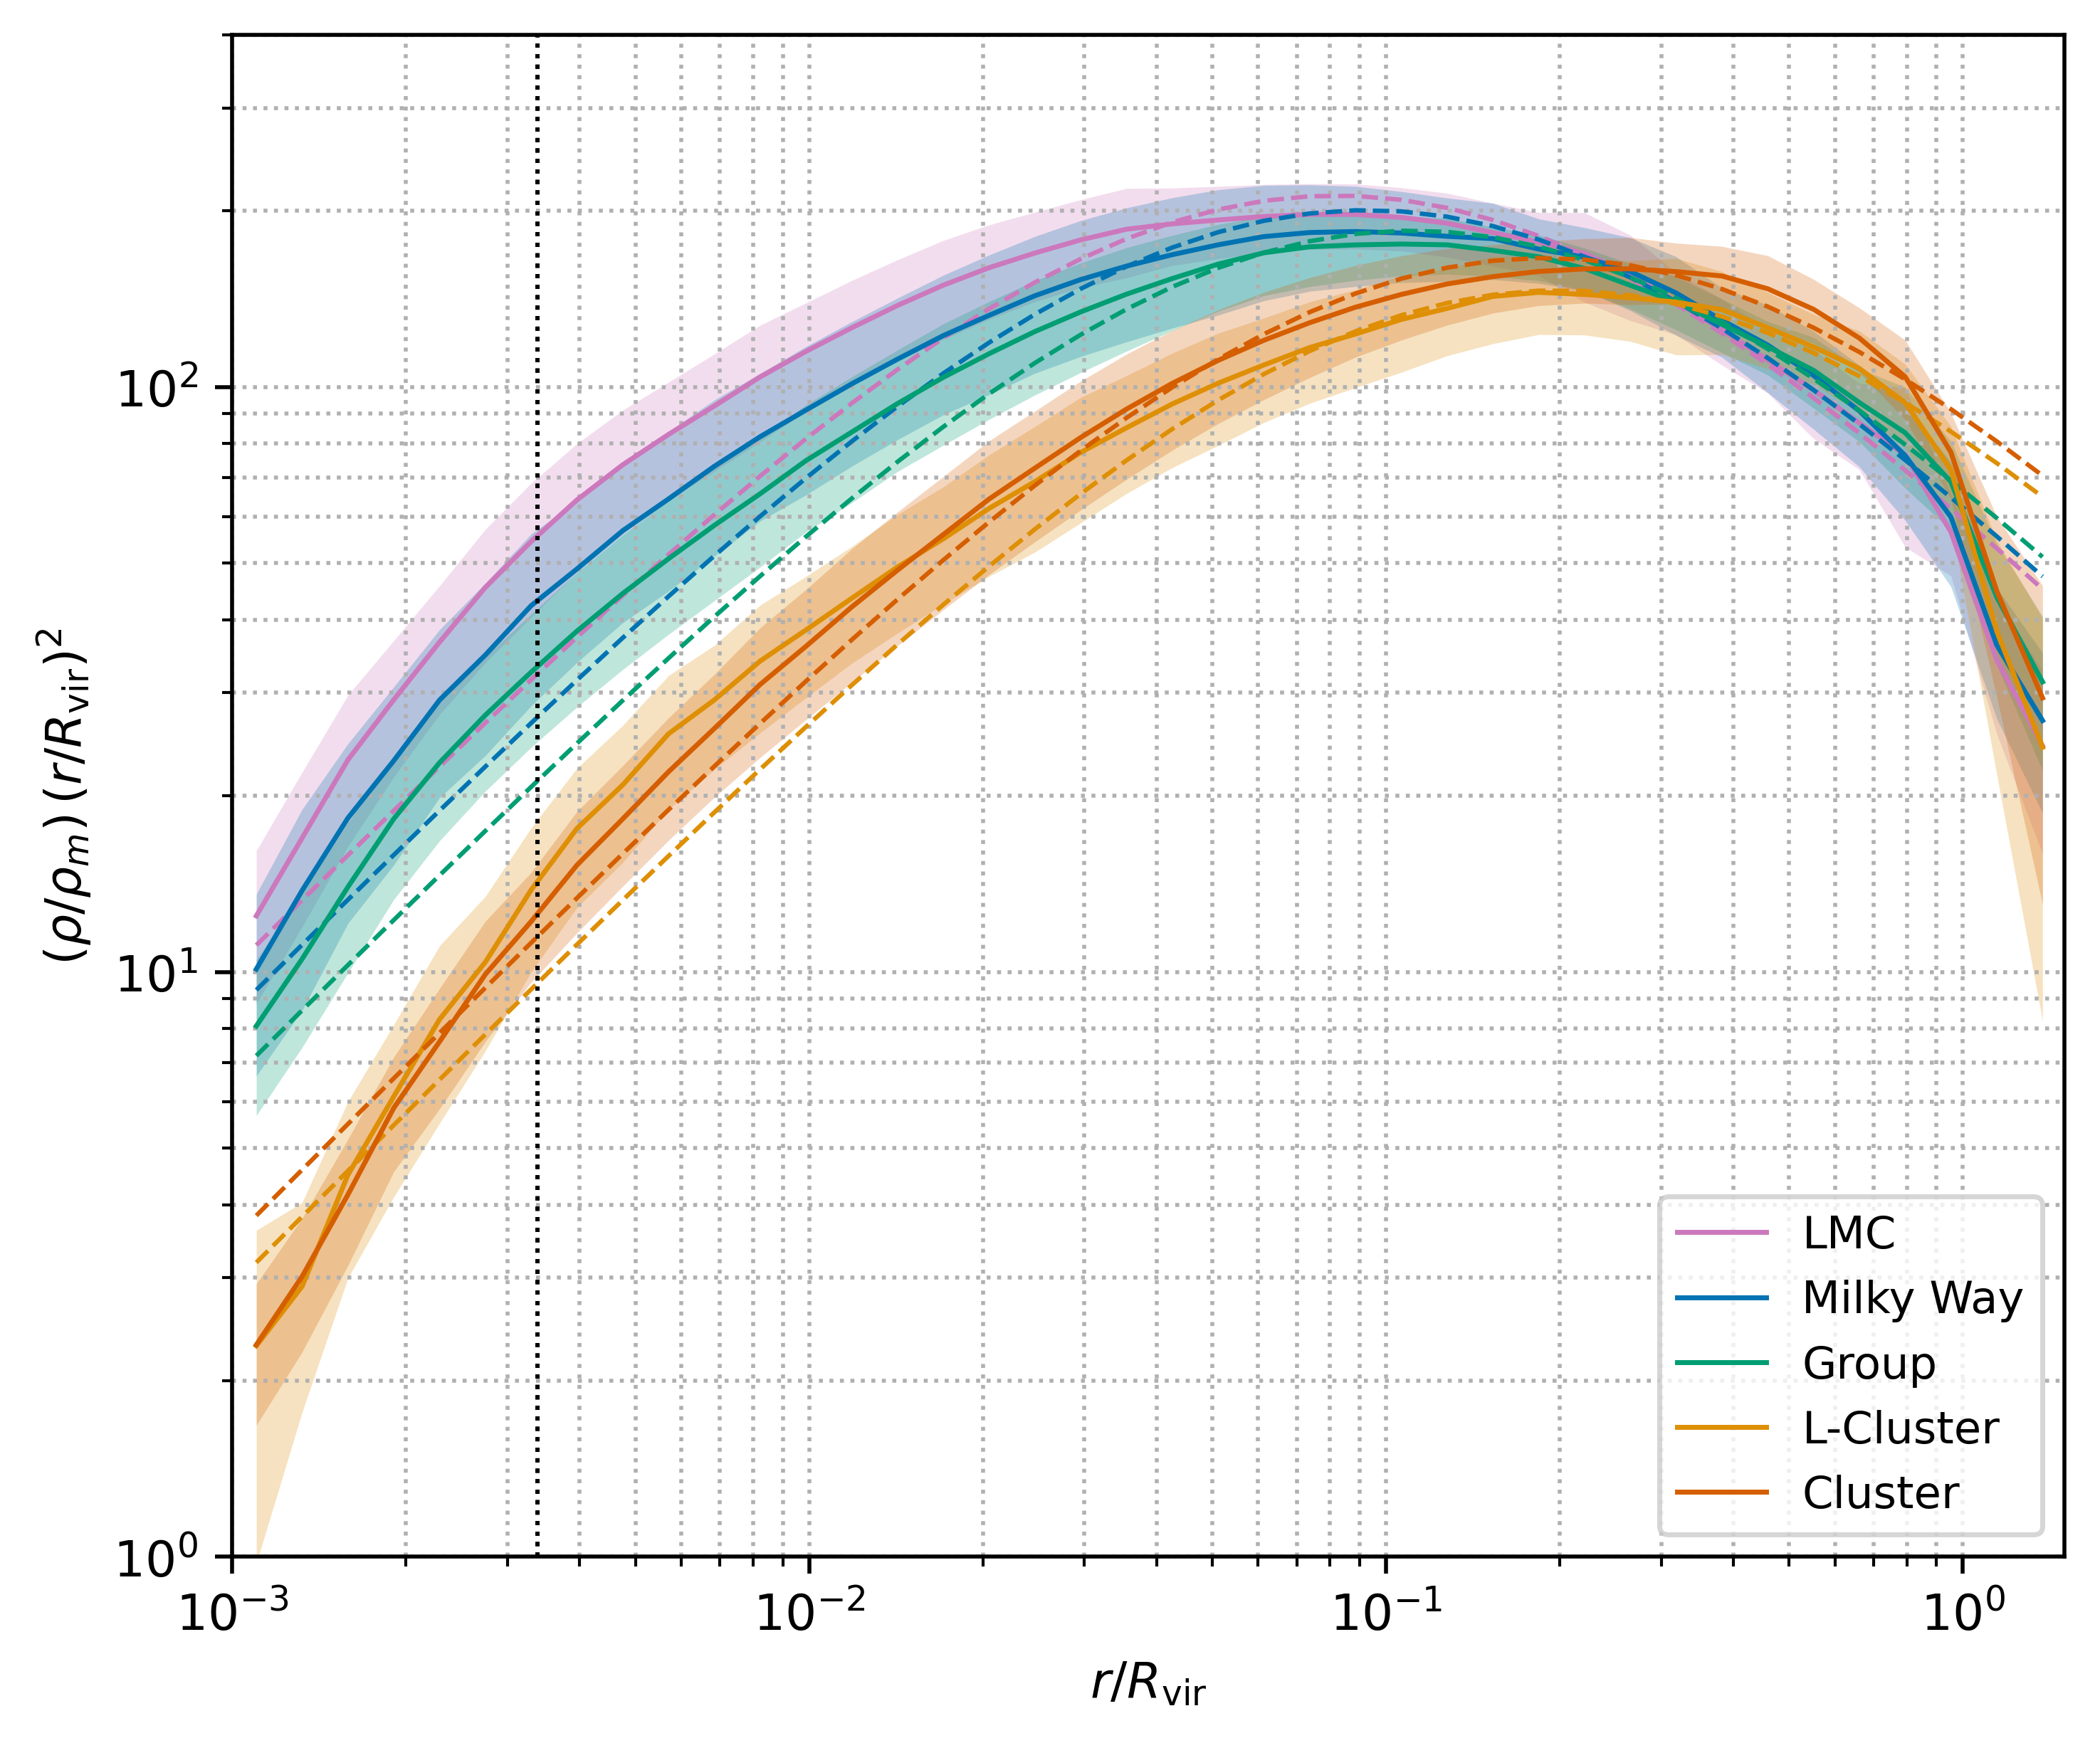

In [32]:
def rho_nfw(c, r, Delta_vir=99, Om0=0.286):
    f = np.log(1 + c) - c / (1 + c)
    x = r * c
    return Delta_vir * c**3 / (3 * f) / (x * (1 + x) ** 2) / Om0

Delta_vir_dic = {
    "SymphonyLMC": 99,
    "SymphonyMilkyWay": 99,
    "SymphonyGroup": 99,
    "SymphonyLCluster": 101,
    "SymphonyCluster": 94,
}
Om0_dic={
    "SymphonyLMC": 0.286,
    "SymphonyMilkyWay": 0.286,
    "SymphonyGroup": 0.286,
    "SymphonyLCluster": 0.3,
    "SymphonyCluster": 0.25,
}

def plot_density_profiles_mean(mask_range):
    plt.figure(figsize=(6, 5), dpi=500)

    for suite in suite_names:
        params = symlib.simulation_parameters(suite)
        h = params['h100']
        eps = params['eps'] / h  # Softening length [kpc]
        r_vir = [pd.read_csv(os.path.join(base_dir, "output", suite, "virial_radius.csv"))]
        mean_rvir = np.mean(r_vir)
        conv_r = 2.8*eps/mean_rvir

        prof_dir = os.path.join(base_dir, "output", suite, "density_profiles")
        files = sorted(glob(os.path.join(prof_dir, "halo_*_profile.csv")))
        p = [pd.read_csv(f) for f in files]
        r = p[0]["r_scaled"].to_numpy()
        if mask_range is not None:
            mask = (r >= mask_range[0]) & (r <= mask_range[1])
            r = r[mask]
        rho_r2 = np.array(
            [(d["rho_scaled"].to_numpy()[mask] if mask_range else d["rho_scaled"].to_numpy()) * r**2 for d in p]
        )
        mean = rho_r2.mean(axis=0)
        std = rho_r2.std(axis=0)
        color = sim_colors[suite]
        plt.loglog(r, mean, lw=1, color=color, label=sim_names[suite])
        plt.fill_between(r, mean - std, mean + std, color=color, alpha=0.25, lw=0)
        plt.loglog(r, rho_nfw(mean_cvir[suite], r, Delta_vir=Delta_vir_dic[suite], Om0=Om0_dic[suite]) * r**2, ls="--", lw=0.9, color=color)
        plt.axvline(3.38e-3, ls=":" ,lw=0.8, color='black')

    plt.xlabel(r"$r / R_{\mathrm{vir}}$")
    plt.ylabel(r"$(\rho / \rho_m)\,(r/R_{\mathrm{vir}})^2$")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1e-3, 1.5)
    plt.ylim(1, 4e2)
    plt.grid(True, which="both", ls=":")
    plt.legend(loc="lower right", fontsize=9, frameon=True)
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, "density_profiles.pdf"))
    plt.show()
    plt.close()

plot_density_profiles_mean(mask_range=(1e-3, 1.5))


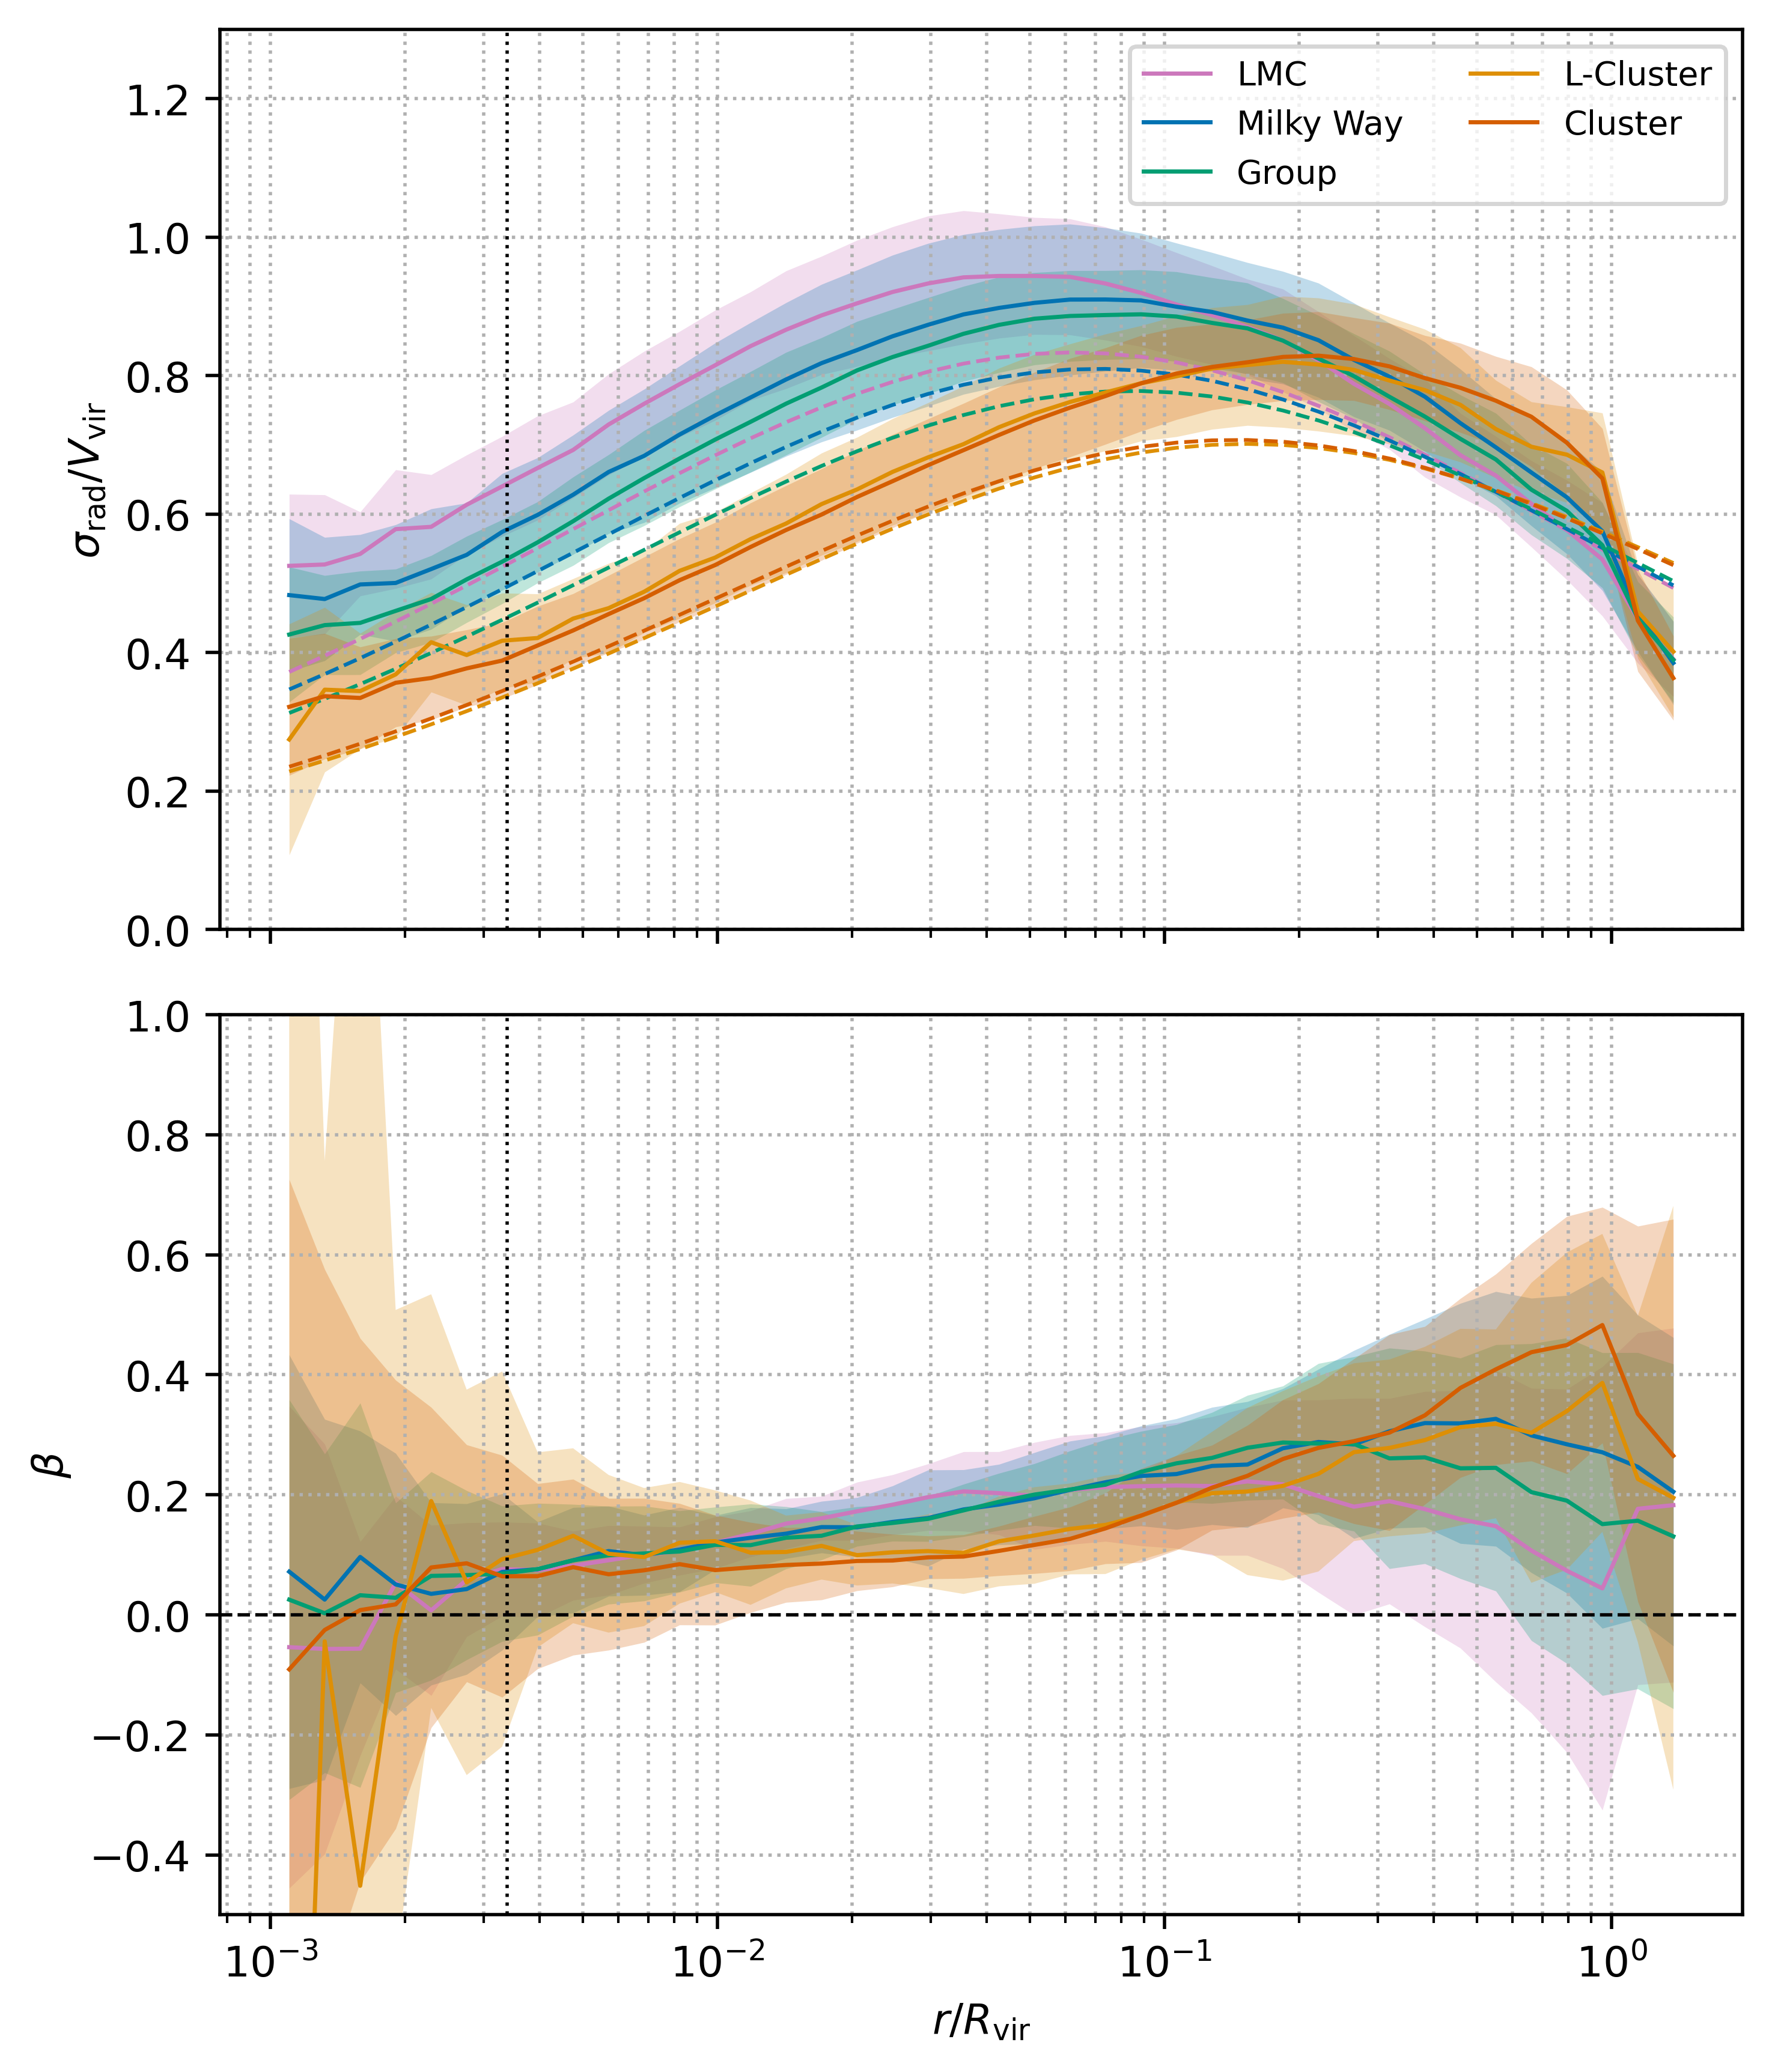

In [36]:
def nfw_sigma_r(x, cvir, beta):
    g_c = 1 / (np.log(1 + cvir) - cvir / (1 + cvir))

    def integrand(t):
        g_t = (t**(2*beta-3)*np.log(1+cvir*t)/(1 + cvir*t)**2) - (cvir*t**(2*beta-2)/(1 + cvir*t)**3)
        return g_t

    integral, _ = quad(integrand, x, np.inf)
    sigma_r2_scaled = g_c *  (1 + cvir * x)**2 * x**(1 - 2*beta) * integral

    return np.sqrt(sigma_r2_scaled)

def plot_sigma_r_and_beta():
    fig, (ax_sig, ax_beta) = plt.subplots(2, 1, figsize=(6, 7), dpi=500, sharex=True)

    for suite in suite_names:
        vdir = os.path.join(base_dir, "output", suite, "velocity_profiles")
        files = sorted(glob(os.path.join(vdir, "halo_*_profile.csv")))

        profs = [pd.read_csv(f) for f in files]
        r = profs[0]["r_scaled"].to_numpy()
        sig_r = np.vstack([p["sigma_rad_scaled"].to_numpy() for p in profs])
        beta  = np.vstack([p["beta"].to_numpy()              for p in profs])
        
        sig_mean, sig_std = sig_r.mean(axis=0), sig_r.std(axis=0)
        beta_mean, beta_std = beta.mean(axis=0), beta.std(axis=0)

        ax_sig.plot(r, sig_mean, lw=1, color=sim_colors[suite], label=sim_names[suite])
        ax_sig.fill_between(r, sig_mean - sig_std, sig_mean + sig_std,
                            color=sim_colors[suite], alpha=0.25, lw=0)

        nfw = np.array([nfw_sigma_r(x=x, cvir=mean_cvir[suite], beta=0) for x in r])
        ax_sig.plot(r, nfw, ls="--", lw=0.9, color=sim_colors[suite])

        ax_beta.semilogx(r, beta_mean, lw=1, color=sim_colors[suite])
        ax_beta.fill_between(r, beta_mean - beta_std, beta_mean + beta_std,
                             color=sim_colors[suite], alpha=0.25, lw=0)
        
    ax_sig.set_ylabel(r"$\sigma_{\rm rad}/V_{\rm vir}$")
    ax_sig.set_ylim(0, 1.3)
    ax_sig.grid(True, which="both", ls=":")
    ax_sig.legend(fontsize=8, ncol=2, frameon=True)
    ax_sig.axvline(3.38e-3, ls=":" ,lw=0.8, color='black')

    ax_beta.set_xlabel(r"$r/R_{\mathrm{vir}}$")
    ax_beta.set_ylabel(r"$\beta$")
    ax_beta.set_ylim(-0.5, 1.0)
    ax_beta.axhline(0, color="k", ls="--", lw=0.8)
    ax_beta.grid(True, which="both", ls=":")
    ax_beta.axvline(3.38e-3, ls=":" ,lw=0.8, color='black')

    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, "velocity_profiles.pdf"))
    plt.show()
    plt.close()

plot_sigma_r_and_beta()

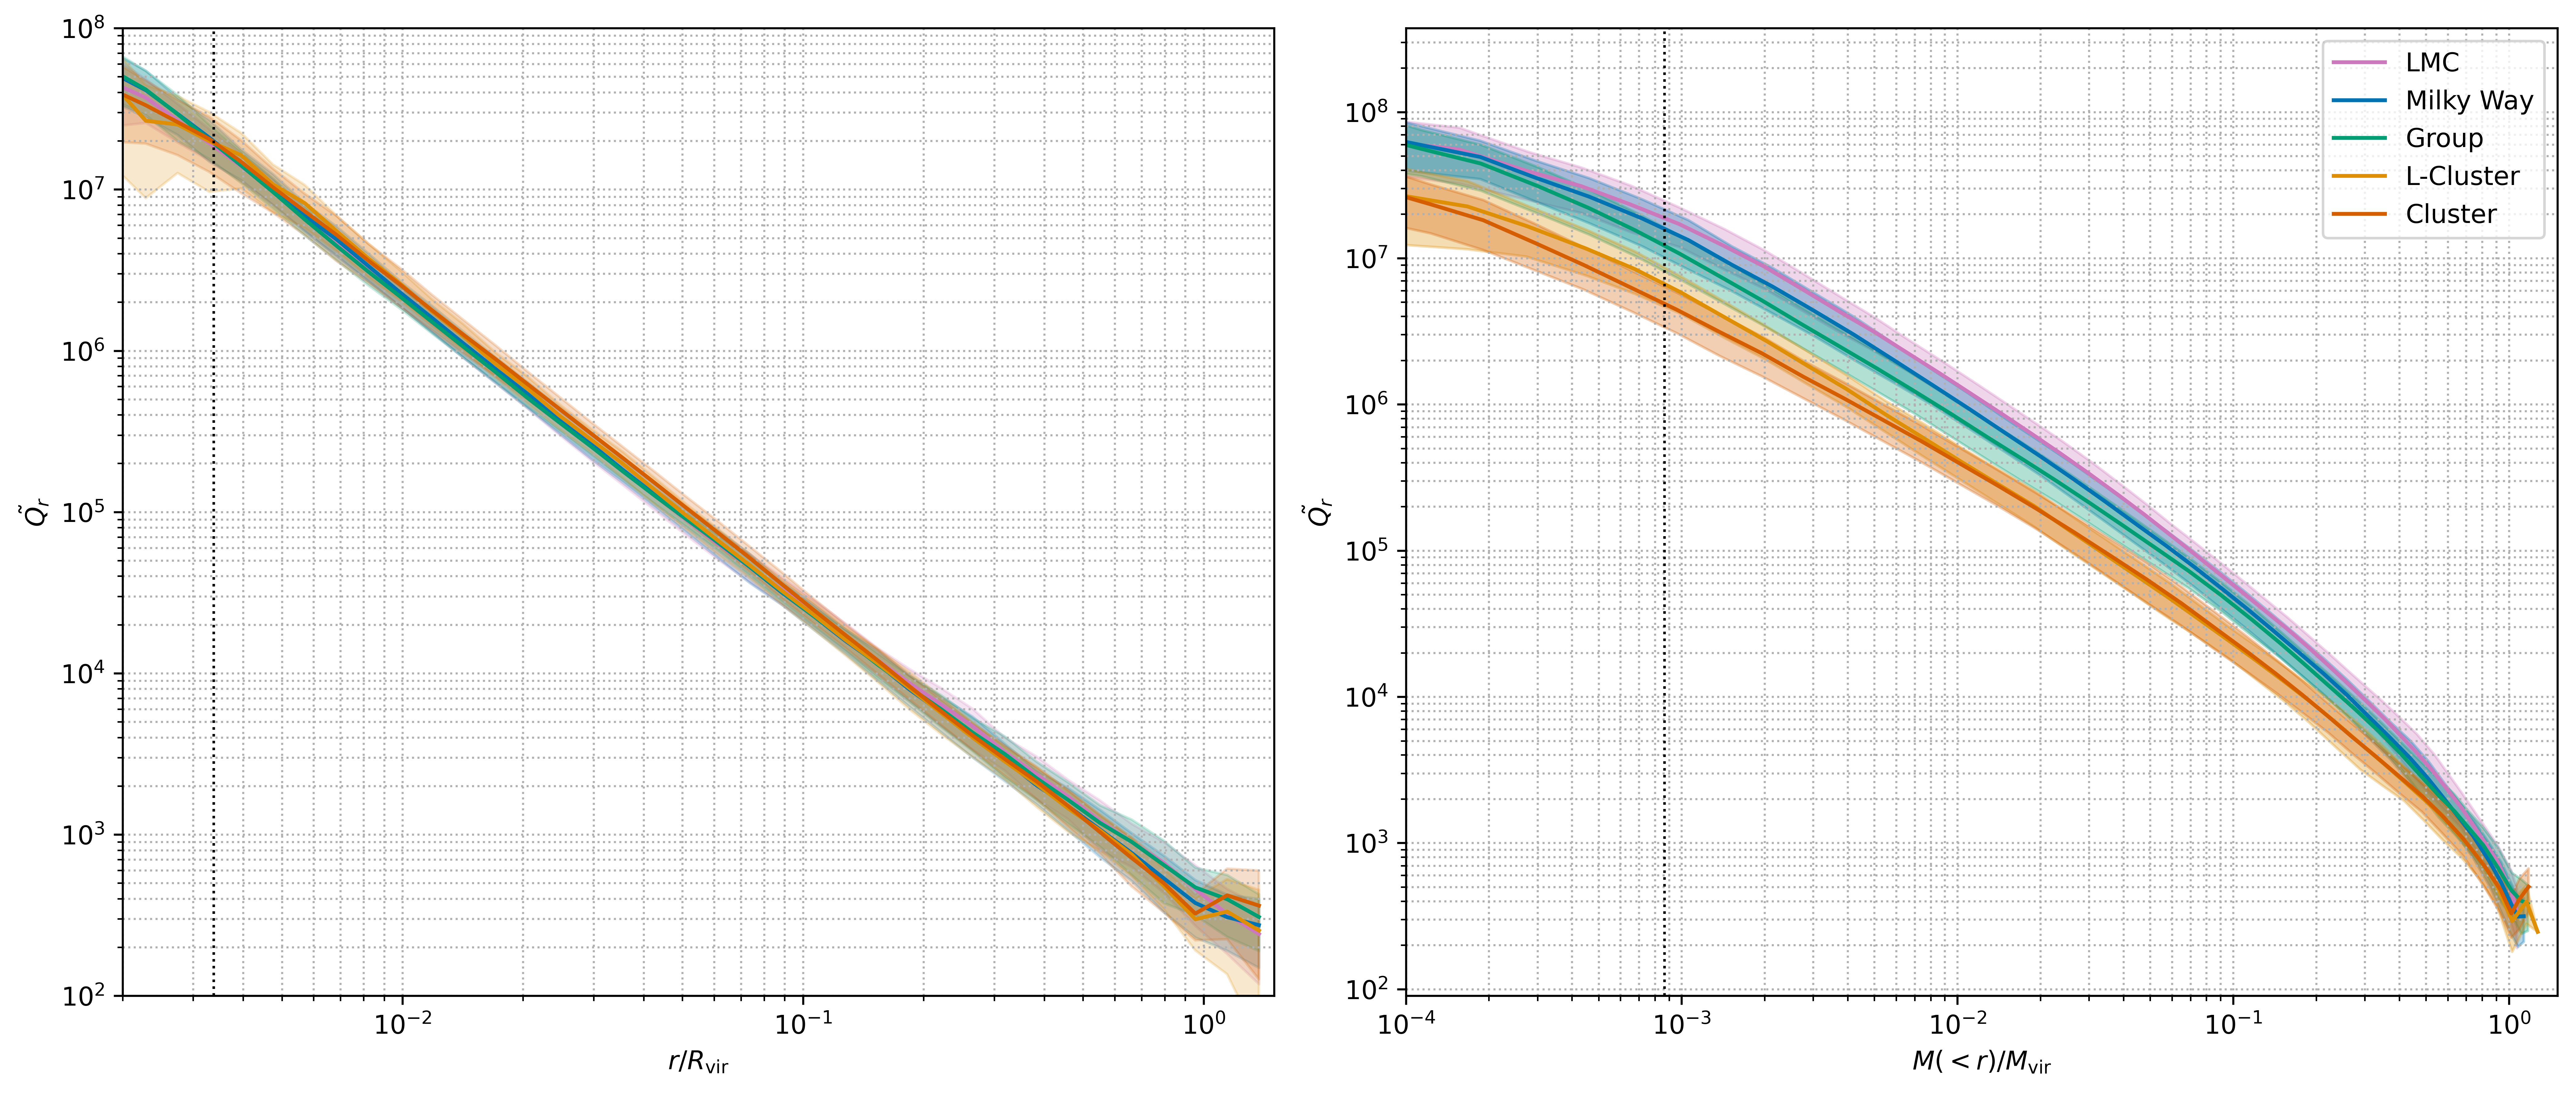

In [41]:
def plot_normalized_ppsd():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

    all_data = {suite: [] for suite in suite_names}
    r = None
    m = None
    convergence_radius = 3.38e-3
    convergence_masses = {}

    def interpolate_curves(x_target, x_list, y_list):
        return np.array([
            np.interp(x_target, x, y, left=np.nan, right=np.nan)
            for x, y in zip(x_list, y_list)
        ])

    for suite in suite_names:
        input_dir = os.path.join(base_dir, "output", suite, "ppsd_profiles")
        mass_dir = os.path.join(base_dir, "output", suite, "mass_profiles")

        files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv")])
        if not files:
            continue

        # Load profile axis from the first file
        r = pd.read_csv(os.path.join(input_dir, files[0]))["r_scaled"].values
        m = pd.read_csv(os.path.join(input_dir, files[0]))["m_scaled"].values

        Qr = np.array([pd.read_csv(os.path.join(input_dir, f))["Q_r"].values for f in files])
        Qtot = np.array([pd.read_csv(os.path.join(input_dir, f))["Q_tot"].values for f in files])
        all_data[suite] = [Qr, Qtot, r, m]

        m_list = [pd.read_csv(os.path.join(input_dir, f))["m_scaled"].values for f in files]
        Qr_interp_m = interpolate_curves(m, m_list, Qr)

        # Compute and store convergence mass per halo
        convergence_mass_list = []
        for f in files:
            halo_id = f.split("_")[1]
            f_mass = os.path.join(mass_dir, f.replace("ppsd", "mass"))
            if not os.path.exists(f_mass):
                continue
            df_mass = pd.read_csv(f_mass)
            r_vals = df_mass["r_scaled"].values
            m_vals = df_mass["m_scaled"].values
            m_conv = np.interp(convergence_radius, r_vals, m_vals, left=np.nan, right=np.nan)
            convergence_mass_list.append(m_conv)
        convergence_masses[suite] = np.nanmean(convergence_mass_list)

        # Plot Qr vs r (mean ± 1σ)
        mean_Qr = np.nanmean(Qr, axis=0)
        std_Qr = np.nanstd(Qr, axis=0)
        axes[0].plot(r, mean_Qr, color=sim_colors[suite], lw=1.5, label=sim_names[suite])
        axes[0].fill_between(r, mean_Qr - std_Qr, mean_Qr + std_Qr, color=sim_colors[suite], alpha=0.2)

        # Plot Qr vs M (mean ± 1σ)
        mean_Qr_m = np.nanmean(Qr_interp_m, axis=0)
        std_Qr_m = np.nanstd(Qr_interp_m, axis=0)
        axes[1].plot(m, mean_Qr_m, color=sim_colors[suite], lw=1.5, label=sim_names[suite])
        axes[1].fill_between(m, mean_Qr_m - std_Qr_m, mean_Qr_m + std_Qr_m, color=sim_colors[suite], alpha=0.3)

    # Add convergence radius line in panel (0)
    axes[0].set_xlim(2e-3, 1.5)
    axes[0].set_ylim(1e2, 1e8)
    axes[0].set_xlabel(r"$r / R_{\mathrm{vir}}$")
    axes[0].set_ylabel(r"$\tilde{Q_r}$")
    axes[0].set_xscale("log")
    axes[0].set_yscale("log")
    axes[0].grid(True, which="both", linestyle=":")
    axes[0].axvline(convergence_radius, ls=":" ,lw=1, color='black')

    # Add convergence mass line in panel (1)
    max_conv_mass = np.nanmax(list(convergence_masses.values()))
    axes[1].set_xlim(1e-4, 1.5)
    axes[1].set_xlabel(r"$M(<r) / M_{\mathrm{vir}}$")
    axes[1].set_ylabel(r"$\tilde{Q_r}$")
    axes[1].set_xscale("log")
    axes[1].set_yscale("log")
    axes[1].grid(True, which="both", linestyle=":")
    axes[1].axvline(max_conv_mass, ls=":", lw=1, color='black')
    axes[1].legend(fontsize=10, loc="best", frameon=True)

    fig.tight_layout(rect=[0, 0, 1, 1])
    save_path = os.path.join(out_dir, "dimensionless_ppsd_profiles.pdf")
    plt.savefig(save_path, format="pdf")
    plt.show()
    plt.close(fig)

plot_normalized_ppsd()

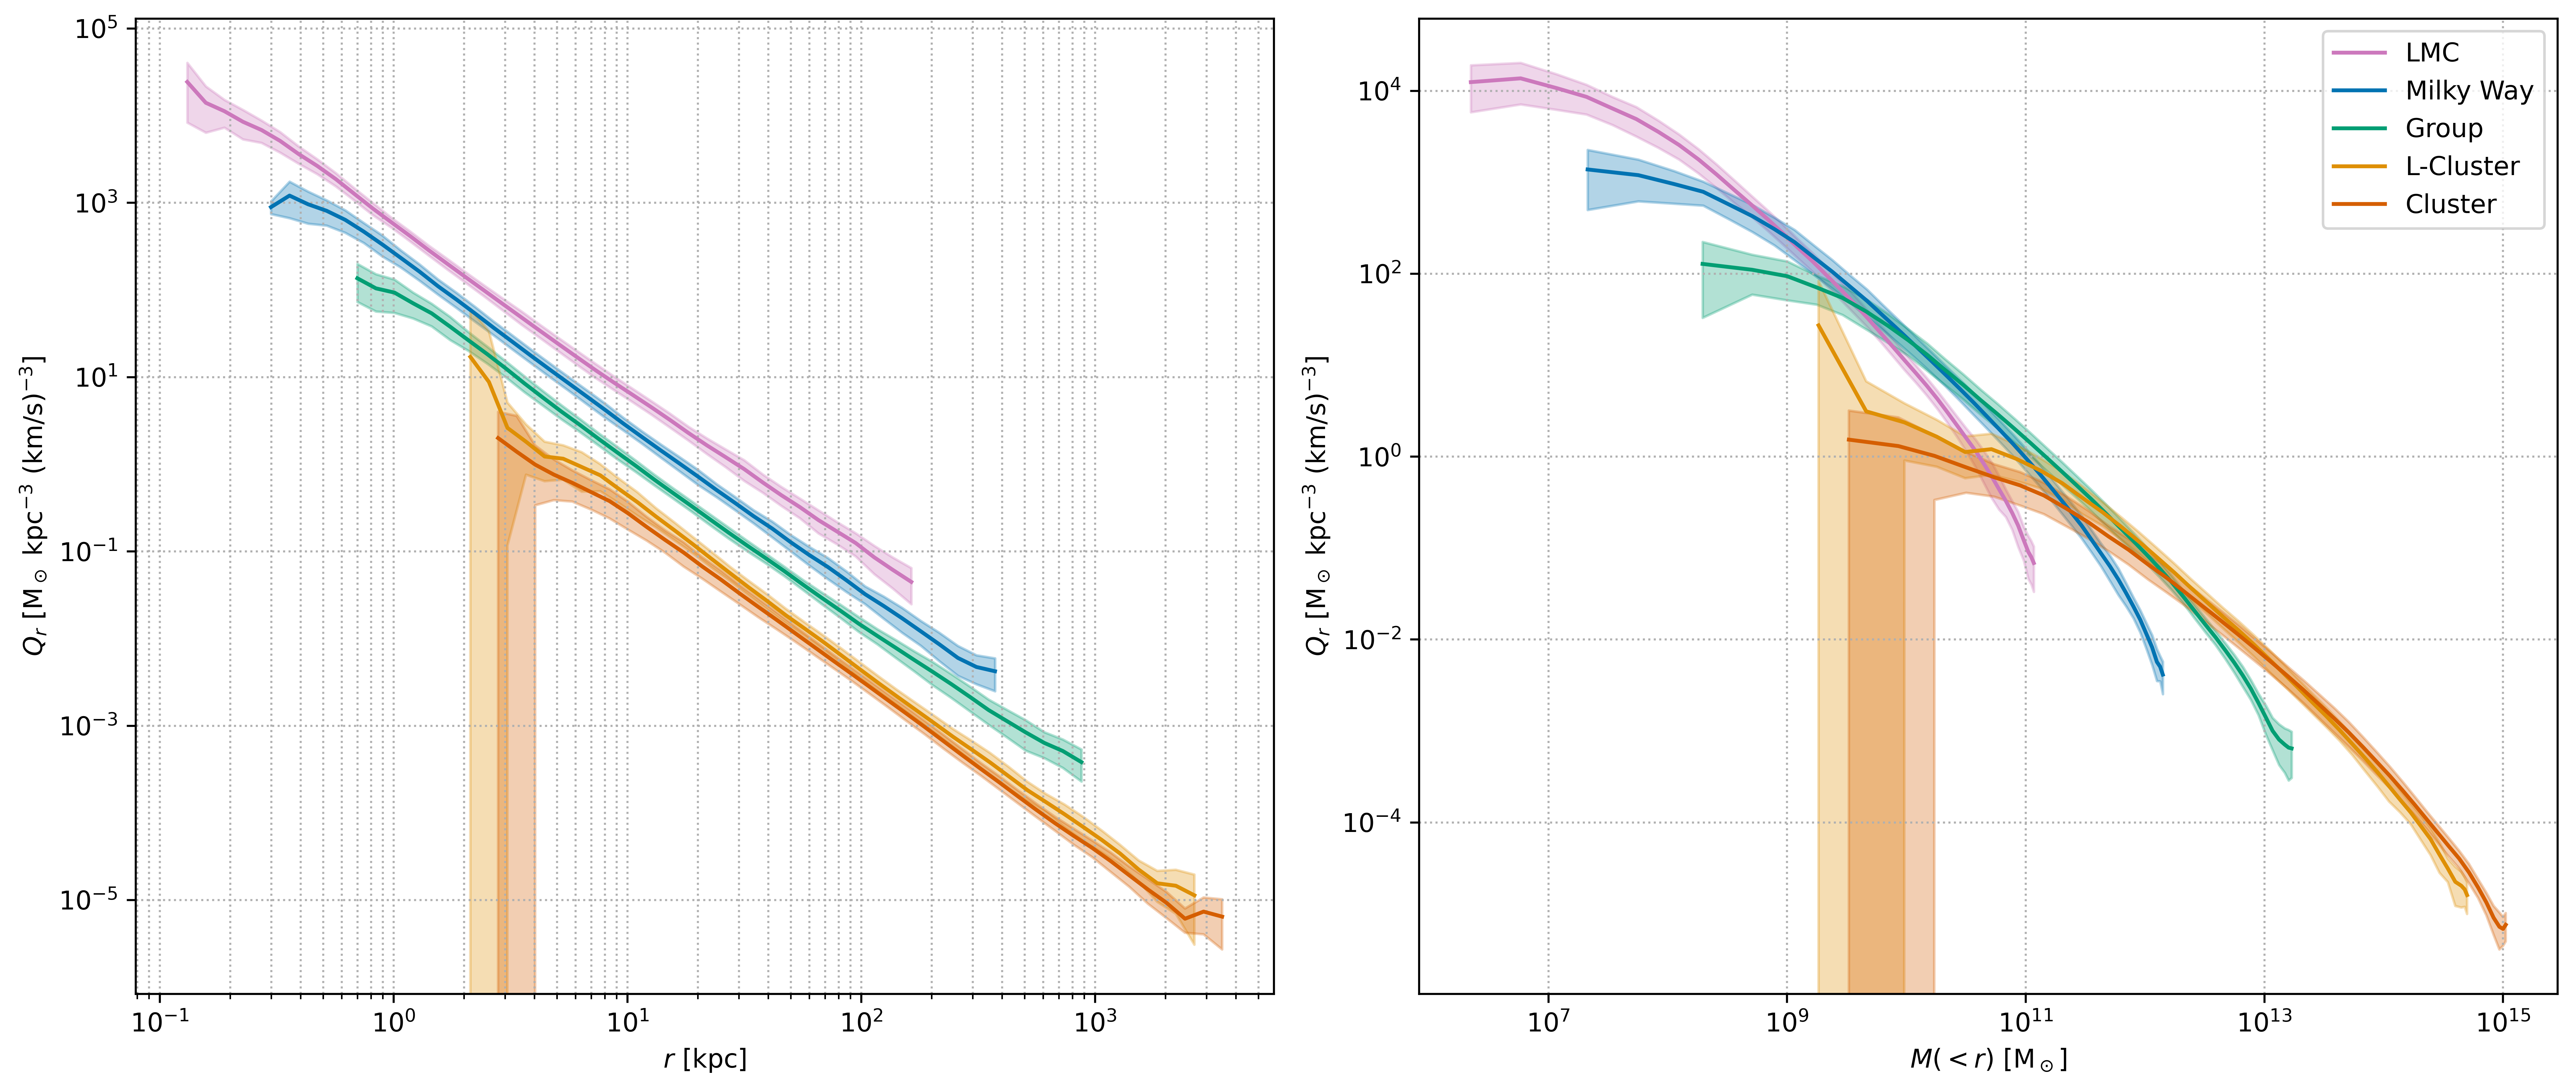

In [65]:
def plot_dimensional_ppsd():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

    for suite in suite_names:
        input_dir = os.path.join(base_dir, "output", suite, "ppsd_profiles")

        files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv")])
        # Load halo-specific virial quantities
        rvir_df = pd.read_csv(os.path.join(base_dir, "output", suite, "virial_radius.csv"),dtype={"halo_id": str})
        vvir_df = pd.read_csv(os.path.join(base_dir, "output", suite, "virial_velocity.csv"),dtype={"halo_id": str})
        mvir_df = pd.read_csv(os.path.join(base_dir, "output", suite, "halo_mass.csv"),dtype={"halo_id": str})

        # Compute background density
        params = symlib.simulation_parameters(suite)
        H0_si = params["H0"] * u.km / u.s / u.Mpc
        G_si = G.to(u.Mpc**3 / u.Msun / u.s**2)
        rho_crit = (3 * H0_si**2 / (8 * np.pi * G_si)).to(u.Msun / u.kpc**3).value
        rho_m = params["Om0"] * rho_crit

        Qr_list, r_list, m_list= [], [], []

        for f in files:
            halo_id = f.split("_")[1]
            profile = pd.read_csv(os.path.join(input_dir, f))
            # Scaled variables
            r_scaled = profile["r_scaled"].values
            m_scaled = profile["m_scaled"].values
            Qr_dimensionless = profile['Q_r'].values

            # Halo virial values
            Rvir = float(rvir_df.loc[rvir_df["halo_id"] == halo_id, "rvir"].values[0])
            Vvir = float(vvir_df.loc[vvir_df["halo_id"] == halo_id, "vvir"].values[0])
            Mvir = float(mvir_df.loc[mvir_df["halo_id"] == halo_id, "mvir"].values[0])
            
            # Dimensional quantities
            r = r_scaled * Rvir
            m = m_scaled * Mvir
            Qr_dimensional = Qr_dimensionless * rho_m / Vvir**3

            # Save for plotting
            Qr_list.append(Qr_dimensional)
            r_list.append(r)
            m_list.append(m)

        # Stack arrays for interpolation and mean
        r_common = r_list[0]
        m_common = np.nanmean(np.vstack(m_list), axis=0)
        Qr_r = np.array([np.interp(r_common, r, q, left=np.nan, right=np.nan) for r, q in zip(r_list, Qr_list)])
        Qr_m = np.array([np.interp(m_common, m, q, left=np.nan, right=np.nan) for m, q in zip(m_list, Qr_list)])

        mean_Qr_r = np.nanmean(Qr_r, axis=0)
        std_Qr_r = np.nanstd(Qr_r, axis=0)
        mean_Qr_m = np.nanmean(Qr_m, axis=0)
        std_Qr_m = np.nanstd(Qr_m, axis=0)

        # Plot Q_r vs r
        axes[0].plot(r_common, mean_Qr_r, color=sim_colors[suite], lw=1.5, label=sim_names[suite])
        axes[0].fill_between(r_common, mean_Qr_r - std_Qr_r, mean_Qr_r + std_Qr_r,
                             color=sim_colors[suite], alpha=0.3)

        # Plot Q_r vs M
        axes[1].plot(m_common, mean_Qr_m, color=sim_colors[suite], lw=1.5, label=sim_names[suite])
        axes[1].fill_between(m_common, mean_Qr_m - std_Qr_m, mean_Qr_m + std_Qr_m,
                             color=sim_colors[suite], alpha=0.3)


    # Final plot styling
    axes[0].set_xlabel(r"$r\ [{\rm kpc}]$")
    axes[0].set_ylabel(r"$Q_r\ [{\rm M_\odot\ kpc^{-3}\ (km/s)^{-3}}]$")
    #axes[0].set_xlim(0.1, 500)
    #axes[0].set_ylim(1e-9, 1e1)
    axes[0].set_xscale("log")
    axes[0].set_yscale("log")
    axes[0].grid(True, which="both", linestyle=":")

    axes[1].set_xlabel(r"$M(<r)\ [{\rm M_\odot}]$")
    axes[1].set_ylabel(r"$Q_r\ [{\rm M_\odot\ kpc^{-3}\ (km/s)^{-3}}]$")
    #axes[1].set_xlim(1e8, 1e15)
    #axes[1].set_ylim(1e-9, 1e1)
    axes[1].set_xscale("log")
    axes[1].set_yscale("log")
    axes[1].grid(True, which="both", linestyle=":")
    axes[1].legend(fontsize=10, loc="best", frameon=True)

    fig.tight_layout()
    save_path = os.path.join(out_dir, "ppsd_profiles_dimensional.pdf")
    plt.savefig(save_path)
    plt.show()
    plt.close(fig)

plot_dimensional_ppsd()